In [1]:
import data_analysis_tools as da
def predict(alpha, beta, xi):
    return beta * xi + alpha

def error(alpha, beta, xi, yi):
    return yi - predict(alpha, beta, xi)

def sum_of_squared_errors(alpha, beta, x, y):
    errors = [error(alpha, beta, xi, yi) for xi, yi in zip(x, y)]
    return da.sum_of_squares(errors)


def least_squares_fit(x, y):
    beta = da.correlation(x, y) * da.standard_deviation(y) / da.standard_deviation(x)
    alpha = da.mean(y) - beta * da.mean(x)
    return alpha, beta


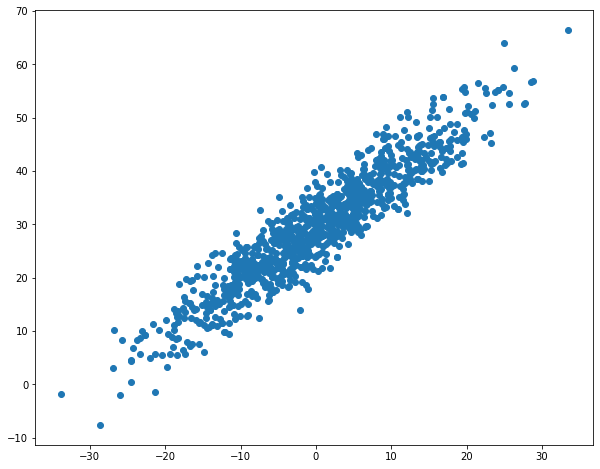

In [2]:
import matplotlib.pyplot as plt
xs = da.random.normal(0, 10, 1000)
ys = [int(da.random.normal(30, 4, 1)) + xi for xi in xs]


plt.figure(figsize=(10, 8))
plt.scatter(xs, ys)
plt.show()

In [3]:
alpha, beta = least_squares_fit(xs, ys)

print(f' alpha: {alpha}, beta: {beta} ')

 alpha: 29.345378963752403, beta: 0.9864947785786211 


In [4]:
predict(alpha, beta, 100)

127.99485682161452

In [5]:
def total_sum_of_squares(y):
    return sum(v ** 2 for v in da.de_mean(y))

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) / total_sum_of_squares(y))

r_squared(alpha, beta, xs, ys)

0.8724229140913516

In [6]:
# using the gradient descent
def squared_error(xi, yi, theta):
    alpha, beta = theta
    return error(alpha, beta, xi, yi) ** 2
    
def squared_error_gradient(xi, yi, theta):
    alpha, beta = theta
    return [-2 * error(alpha, beta, xi, yi), -2 * error(alpha, beta, xi, yi) * xi]

da.r.seed(0)
theta = [da.random.random(), da.random.random()]

alpha, beta = da.minimize_stochastic(
    squared_error,
    squared_error_gradient,
    xs,
    ys,
    theta,
    0.0001
)

print(alpha, beta)

29.34532345553195 0.9865889316470358


In [7]:
# multiple regression
from collections import defaultdict

data = da.file_ops.read_csv('./files/hss.csv')
data

keys = ["Radio", "Social Media", "Influencer", "Sales"]
data = [(0.0 if data_i["Radio"] == "" else float(data_i["Radio"]), 
    0.0 if data_i["Social Media"] == "" else float(data_i["Social Media"]), 
    0 if data_i["Influencer"] == "Mega" else 1 if data_i["Influencer"] == "Micro" else 2 if data_i["Influencer"] == "Nano" else 3,
    0.0 if data_i["Sales"] == "" else float(data_i["Sales"])) 
    for data_i in data]

train, test = da.random.split_data(data, 0.2)

train[:5]

array([[ 32.36994086,   5.28590161,   1.        , 341.1248757 ],
       [ 36.13477932,   6.81252894,   1.        , 275.8154126 ],
       [ 22.72019   ,   2.46555663,   3.        , 222.9110745 ],
       [ 19.86674573,   3.23932972,   1.        , 152.4606811 ],
       [ 36.73607325,   7.60834982,   2.        , 347.7546808 ]])

In [8]:
train_features = [(train_i[0], train_i[1], train_i[2]) for train_i in train]
train_labels = [train_i[3] for train_i in train]

test_features = [(test_i[0], test_i[1], test_i[2]) for test_i in test]
test_labels = [test_i[3] for test_i in test]

print(train_features[:5])
print(train_labels[:5])

[(32.36994086, 5.285901611, 1.0), (36.13477932, 6.812528936, 1.0), (22.72019, 2.46555663, 3.0), (19.86674573, 3.239329723, 1.0), (36.73607325, 7.608349815, 2.0)]
[341.1248757, 275.8154126, 222.9110745, 152.4606811, 347.7546808]


In [9]:
train_data = []

for j in range(len(train[0])):
    col = []
    for i in range(len(train)):
        col.append(train[i][j])
    train_data.append(col)

In [10]:
def predict(xi, beta):
    return da.dot_product(xi, beta)

def error(xi, yi, beta):
    return yi - predict(xi, beta)

def squared_error(xi, yi, beta):
    return error(xi, yi, beta) ** 2

def squared_error_gradient(xi, yi, beta):
    return [-2 * xij * error(xi, yi, beta) for xij in xi]

def estimate_beta(x, y):
    beta_initial = [da.random.random() for xi in x[0]]
    return da.minimize_stochastic(squared_error,
        squared_error_gradient,
        x, y,
        beta_initial,
        0.001
    )

da.r.seed(0)
beta = estimate_beta(train_features, train_labels)
beta

[9.242909811289781, 1.918219332414282, 7.985198561351903]

In [11]:
print(beta)

[9.242909811289781, 1.918219332414282, 7.985198561351903]


In [12]:
test_index = 3
predicted = predict(test_features[test_index], beta)
actual = test_labels[test_index]

print(f' predicted: {predicted}, actual: {actual} ')

 predicted: 99.78620657155633, actual: 49.16942945 


In [13]:
for test_index in range(20):
    predicted = predict(test_features[test_index], beta)
    actual = test_labels[test_index]

    print(f' predicted: {predicted}, actual: {actual} ')

 predicted: 120.56208982563199, actual: 60.38358214 
 predicted: 95.62909175853173, actual: 133.5654887 
 predicted: 236.7828347797457, actual: 245.4126376 
 predicted: 99.78620657155633, actual: 49.16942945 
 predicted: 89.93783496349096, actual: 172.524878 
 predicted: 218.79070132422308, actual: 107.7477433 
 predicted: 137.8152408688443, actual: 166.2649357 
 predicted: 131.804511665807, actual: 70.20770114 
 predicted: 176.09193324334055, actual: 158.5720707 
 predicted: 233.79222250777923, actual: 234.8510253 
 predicted: 172.40210609838263, actual: 141.3801238 
 predicted: 304.96983157697065, actual: 280.1919658 
 predicted: 211.31094868969888, actual: 279.0002133 
 predicted: 169.42108172381373, actual: 106.3487777 
 predicted: 166.464951390838, actual: 101.1209009 
 predicted: 184.79139242250116, actual: 295.518075 
 predicted: 139.5369009179344, actual: 136.8019191 
 predicted: 72.52052078079478, actual: 106.9499394 
 predicted: 139.34254945851077, actual: 120.067237 
 predic

In [14]:
def test_model(test_features, test_labels, allowed_error=0.25):
    """if actual + actual * (allowed_error / 2) > predicted > actual - actual * (allowed_error / 2): 
        correct += 1\n
        returns correct / total"""
    correct = 0
    total = len(test_labels)
    for feature, label in zip(test_features, test_labels):
        predicted = predict(feature, beta)
        actual = label

        
        if actual + actual * (allowed_error / 2) > predicted > actual - actual * (allowed_error / 2):
            correct += 1
        

    return correct / total

test_model(test_features, test_labels, allowed_error=0.4)

0.5256830601092897

In [15]:
def multiple_r_squared(x, y, beta):
    sum_of_sq_errs = sum(error(xi, yi, beta) ** 2 for xi, yi in zip(x, y))
    return 1 - sum_of_sq_errs / total_sum_of_squares(y)

multiple_r_squared(test_features, test_labels, beta)

0.7040424173246247

In [16]:
def multiple_r_squared(x, y, beta):
    sum_of_sq_errs = sum(error(xi, yi, beta) ** 2 for xi, yi in zip(x, y))
    return 1 - sum_of_sq_errs / total_sum_of_squares(y)

print('on train data:', multiple_r_squared(train_features, train_labels, beta))
print('on test data:', multiple_r_squared(test_features, test_labels, beta))

on train data: 0.7226839274944452
on test data: 0.7040424173246247


In [21]:
# digression, the bootstrap
def bootstrap_sample(xs, ys=None):
    if ys:
        length = len(ys)
        sample_index = da.random.rand_index(length)
        return xs[sample_index], ys[sample_index]
    else:
        return da.random.sample(xs)

        
def bootstrap_statistic(data, stats_fn, num_samples):
    try:
        xs, ys = zip(*data)
        samples = [bootstrap_sample(xs, ys) for _ in range(num_samples)]
    except:
        samples = [bootstrap_sample(data) for _ in range(num_samples)]

    return stats_fn(samples)

print('mean:', da.median(xs))
print('bootstrap mean:', bootstrap_statistic(xs, da.median, 10))

mean: 0.15811044397747687
bootstrap mean: -5.254985136542382


In [34]:
def estimate_sample_beta(sample):
    x_sample, y_sample = list(zip(*sample))
    return estimate_beta(x_sample, y_sample)


bootstrap_betas = [bootstrap_statistic(zip(train_features, train_labels), estimate_sample_beta, 100)
    for _ in range(10)]
bootstrap_betas


[[10.178490619197612, -2.2690826865255675, 4.454531736896569],
 [9.896670814074021, -2.59285959210267, 7.581807055373179],
 [9.916950611255368, -0.6422134990111517, 9.637377614565526],
 [9.52436055886033, 4.441667083612727, 1.360865959995173],
 [8.48502336643787, 5.169659713745091, 15.598841148515238],
 [8.67089119192248, 8.003962047570052, 4.988913202032447],
 [8.413408784041764, 1.4214576705394024, 16.569908697144893],
 [10.19376977899914, -3.4410126402554226, 7.314064083665666],
 [8.488841658705585, 3.046040542553439, 12.261504362605715],
 [9.525307668820478, -0.6585377535064224, 13.376094899637554]]

In [35]:
bootstrap_standard_errors = [da.standard_deviation([beta[i] for beta in bootstrap_betas])
    for i in range(3)]

bootstrap_standard_errors

[0.7381414574073568, 3.812285559130534, 5.0554018689976115]